<a href="https://colab.research.google.com/github/whiskey21/auto_encoder/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


In [20]:
# data load
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
# normalization
x_train = x_train.astype(np.float32)/255.
x_test = x_test.astype(np.float32)/255.
# flatten
x_train_flatten = x_train.reshape((x_train.shape[0], -1))
x_test_flatten = x_test.reshape((x_test.shape[0], -1))

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [7]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# encoder의 shape = (samples, 4, 4, 8)



In [8]:

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# decoder의 shape = (sampels, 28, 28, 1)


In [21]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
encoder = Model(input_img, encoded)
decoded_input = Input(shape=(4,4,8))
decoded_layer = autoencoder.layers[7](decoded_input)
for i in range(8,len(autoencoder.layers)):
  decoded_layer = autoencoder.layers[i](decoded_layer)
decoder = Model(decoded_input, decoded_layer)
from tensorflow.keras.callbacks import TensorBoard
autoencoder.fit(x_train, x_train,
batch_size=256, epochs=10,
validation_data=(x_test,x_test),
callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])



Epoch 1/10
235/235 [==============================] - 56s 236ms/step - loss: 0.1093 - val_loss: 0.1058
Epoch 2/10
235/235 [==============================] - 52s 221ms/step - loss: 0.1068 - val_loss: 0.1057
Epoch 3/10
235/235 [==============================] - 52s 223ms/step - loss: 0.1064 - val_loss: 0.1050
Epoch 4/10
235/235 [==============================] - 52s 220ms/step - loss: 0.1060 - val_loss: 0.1049
Epoch 5/10
235/235 [==============================] - 51s 217ms/step - loss: 0.1056 - val_loss: 0.1041
Epoch 6/10
235/235 [==============================] - 51s 219ms/step - loss: 0.1050 - val_loss: 0.1036
Epoch 7/10
235/235 [==============================] - 52s 220ms/step - loss: 0.1045 - val_loss: 0.1030
Epoch 8/10
235/235 [==============================] - 51s 219ms/step - loss: 0.1041 - val_loss: 0.1027
Epoch 9/10
235/235 [==============================] - 51s 217ms/step - loss: 0.1036 - val_loss: 0.1022
Epoch 10/10
235/235 [==============================] - 52s 221ms/step - l

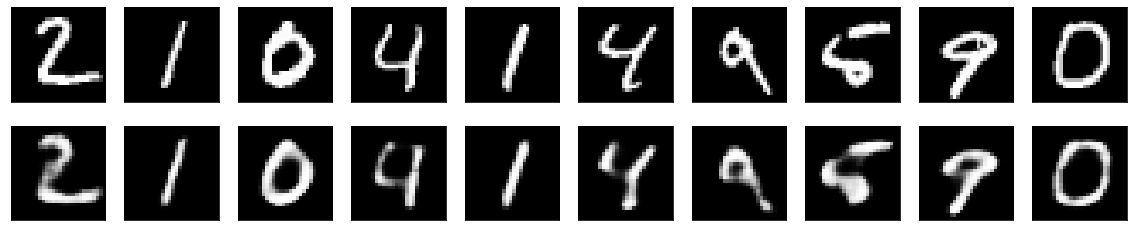

In [23]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
n = 10 # 이미지 갯수
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
# 원본 데이터
  ax = plt.subplot(2, n, i)
  plt.imshow(x_test_flatten[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # 재구성된 데이터
  ax = plt.subplot(2, n, i + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
def square_sum(y, t):
  return 1.0 / 2.0 * np.sum(np.square(y-t))

In [28]:
loss_rate = square_sum(decoded_imgs[2], x_test_flatten[2])
print(loss_rate)

22081.548828125


In [29]:
def cross_entropy(y, t):
  return -np.sum(t * np.log(y + 1e-7))

In [31]:
loss_rate2 = cross_entropy(decoded_imgs[2], x_test_flatten[2])
print(loss_rate2)

344224.72
